## Tacotron 2 inference code 
Edit the variables **checkpoint_path** and **text** to match yours and run the entire code to generate plots of mel outputs, alignments and audio synthesis from the generated mel-spectrogram using Griffin-Lim.

#### Import libraries and setup matplotlib

In [54]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pylab as plt
%matplotlib inline
import IPython.display as ipd

import sys
sys.path.append('waveglow/')
import numpy as np
import torch

from hparams import create_hparams
from model import Tacotron2
# from layers import TacotronSTFT
# from audio_processing import griffin_lim
from train import load_model
from text import text_to_sequence
import pickle
from scipy.stats import pearsonr
%matpltolib inline


UsageError: Line magic function `%matpltolib` not found.


In [55]:
def plot_data(data, figsize=(16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none')

#### Setup hparams

In [56]:
hparams = create_hparams()
hparams.sampling_rate = 22050

#### Load model from checkpoint

In [62]:
checkpoint_path = "waveglow/checkpoint_43000"
model = load_model(hparams)
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])
_ = model.eval()

In [63]:
with open('new_var/test_new_phoneme', 'rb') as handle:
    test_phoneme= pickle.loads(handle.read())
    
with open('new_var/test_new_ema', 'rb') as handle:
    test_ema= pickle.loads(handle.read())
    
with open('new_var/test_ema_len', 'rb') as handle:
    test_ema_len= pickle.loads(handle.read())
    
test_phoneme = np.array(test_phoneme)
test_ema = np.array(test_ema)
test_ema_len = np.array(test_ema_len)

with open('new_var/train_new_phoneme', 'rb') as handle:
    train_phoneme= pickle.loads(handle.read())
    
with open('new_var/train_new_ema', 'rb') as handle:
    train_ema= pickle.loads(handle.read())
    
    
with open('new_var/train_ema_len', 'rb') as handle:
    train_ema_len= pickle.loads(handle.read())
    

    
train_phoneme = np.array(train_phoneme)
train_ema = np.array(train_ema)





#### Prepare text input

In [64]:
# sequence = np.array(text_to_sequence(text, ['english_cleaners']))[None, :]
sequence = torch.autograd.Variable(
    torch.from_numpy(test_phoneme)).cuda().long()

#### Decode text input and plot results

is this getting executed
Warning! Reached max decoder steps


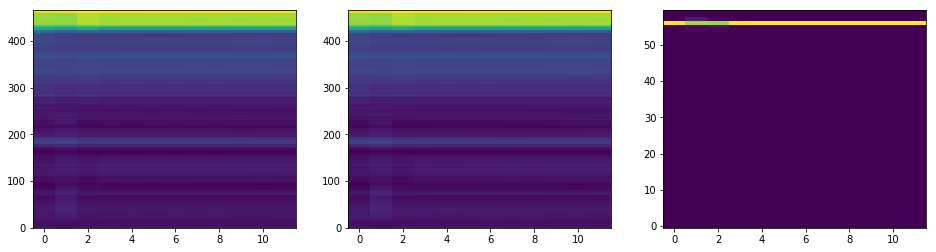

In [65]:
mel_outputs, mel_outputs_postnet, alignments = model.inference(sequence)
plot_data((mel_outputs.data.cpu().numpy()[0],
           mel_outputs_postnet.data.cpu().numpy()[0],
           alignments.data.cpu().numpy()[0].T))

In [66]:
output = mel_outputs.cpu().detach().numpy()
postnet_output = mel_outputs_postnet.cpu().detach().numpy()

In [67]:
np.shape(postnet_output)

(60, 466, 12)

In [68]:
check = []

for i in test_ema_len:
    check.append(int(i))

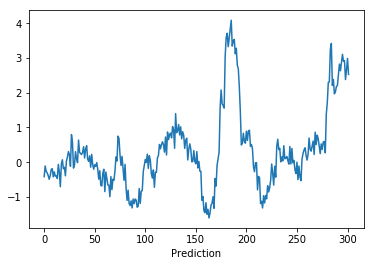

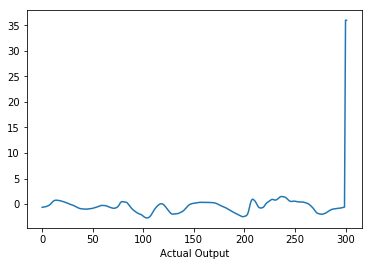

In [69]:
noo, point= 8, 9

plt.plot(output[noo,:check[noo],point])
plt.xlabel('Prediction')
plt.show()



plt.plot(test_ema[noo,:check[noo],point])
plt.xlabel('Actual Output')
plt.show()

# print(pearsonr(test_ema[noo,:,11],translation[noo,:,11])[0])



In [70]:
count=0
avg=0.0
for i in range(test_ema.shape[0]):
    for j in range(test_ema.shape[2]):
        avg+=pearsonr(test_ema[i,:check[i],j],output[i,:check[i],j])[0]
        count+=1
avg=float(avg/count)

print(avg)


0.08912312348677219


In [51]:
output.shape

(60, 466, 12)

In [52]:
test_ema[0,:50,1].shape

(50,)

In [53]:
test_ema.shape

(60, 466, 12)